In [1]:
from src.ElliotWaves.misc.direction import direction
import pandas as pd
import os
import datetime
from pandas_data_reader_service_core.service import PandasDataReaderService as pdrs,StockInfo,TimeFrame
from pandas_data_reader_service_core.modules.finam.stock_info import FinamStockInfo
from pandas_data_reader_service_core.modules.finam.search_service import Search, Market

# Load

In [2]:
from os import listdir
from os.path import isfile, join
output_dir = "files"
onlyfiles = [join(output_dir, f) for f in listdir(output_dir) if (isfile(join(output_dir, f))) and ("Analitic" in f)]
onlyfiles

['files/Analitic_EURUSD_20150101_20210101_DAILY.csv',
 'files/Analitic_EURUSD_20200107_20210714_DAILY.csv']

In [3]:
file_name = onlyfiles[1]
parts = file_name.split("/")[1].split(".")[0].split("_")
code = parts[1]
format = '%Y%m%d'
from_dt = datetime.datetime.strptime(parts[2], format).date()
till_dt = datetime.datetime.strptime(parts[3], format).date()
tf_enum = TimeFrame[parts[4]]
print(f"code: {code}, from_dt {from_dt}, till_dt {till_dt}, tf_enum {tf_enum}")

code: EURUSD, from_dt 2020-01-07, till_dt 2021-07-14, tf_enum D


In [4]:
stock_info = StockInfo.init_for_Finam(FinamStockInfo(83))
print(stock_info)

Source StockSource.Finam source StockInfo Market 5 code EURUSD index 83


In [5]:
data_df = pdrs().get(stock=stock_info,  date_from=from_dt,date_to=till_dt,time_frame=tf_enum,short_col_name=True)
data_df

,O,H,L,C,V
DT,,,,,
2020-01-07,1.11954,1.11971,1.11320,1.11540,1610661
2020-01-08,1.11541,1.11682,1.11000,1.11127,2131727
2020-01-09,1.11129,1.11204,1.10920,1.11092,1423627
2020-01-10,1.11093,1.11292,1.10840,1.11200,1299383
2020-01-12,1.11175,1.11225,1.11108,1.11160,34731
...,...,...,...,...,...
2021-07-11,1.18500,1.18785,1.18500,1.18724,43118
2021-07-12,1.18724,1.18802,1.18340,1.18626,776966
2021-07-13,1.18619,1.18751,1.17700,1.17740,925275


In [6]:
df = pd.read_csv(onlyfiles[1],index_col="index").rename(columns={"SubWaveCount":"Count"})
df

,Count,Direction,Full,Wave1 Change%,Wave1 Profit%,Wave1 from,Wave1 till,Wave2 Change%,Wave2 Profit%,Wave2 from,...,Wave3 from,Wave3 till,Wave4 Change%,Wave4 Profit%,Wave4 from,Wave4 till,Wave5 Change%,Wave5 Profit%,Wave5 from,Wave5 till
index,,,,,,,,,,,,,,,,,,,,,
0,5,Short,True,-1.840655,1.840655,2020-01-07,2020-01-29,0.952598,0.952598,2020-01-29,...,2020-01-31,2020-02-16,0.296703,0.296703,2020-02-16,2020-02-17,-0.686573,0.686573,2020-02-17,2020-02-20
1,5,Short,True,-1.010083,1.010083,2020-01-07,2020-01-10,0.801155,0.801155,2020-01-10,...,2020-01-16,2020-02-16,0.296703,0.296703,2020-02-16,2020-02-17,-0.686573,0.686573,2020-02-17,2020-02-20
2,5,Short,True,-1.627166,1.627166,2020-01-16,2020-01-29,0.952598,0.952598,2020-01-29,...,2020-01-31,2020-02-16,0.296703,0.296703,2020-02-16,2020-02-17,-0.686573,0.686573,2020-02-17,2020-02-20
3,5,Short,True,-1.362315,1.362315,2020-01-17,2020-01-29,0.952598,0.952598,2020-01-29,...,2020-01-31,2020-02-16,0.296703,0.296703,2020-02-16,2020-02-17,-0.686573,0.686573,2020-02-17,2020-02-20
4,5,Short,True,-1.143181,1.143181,2020-01-21,2020-01-29,0.952598,0.952598,2020-01-29,...,2020-01-31,2020-02-16,0.296703,0.296703,2020-02-16,2020-02-17,-0.686573,0.686573,2020-02-17,2020-02-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,2,Short,False,-0.927594,0.927594,2021-07-12,2021-07-14,0.684792,0.684792,2021-07-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4899,1,Short,False,-0.927594,0.927594,2021-07-12,2021-07-13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4900,1,Short,False,-0.885045,0.885045,2021-07-13,2021-07-14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
from example.ElliotWales.misc.analitic import change_col_name

In [8]:
df = change_col_name(df)
df

Type  Count Direction   Full  Change %  Profit %        from        till  \
Wave  Waves     Waves  Waves     Wave1     Wave1       Wave1       Wave1   
index                                                                      
0         5     Short   True -1.840655  1.840655  2020-01-07  2020-01-29   
1         5     Short   True -1.010083  1.010083  2020-01-07  2020-01-10   
2         5     Short   True -1.627166  1.627166  2020-01-16  2020-01-29   
3         5     Short   True -1.362315  1.362315  2020-01-17  2020-01-29   
4         5     Short   True -1.143181  1.143181  2020-01-21  2020-01-29   
...     ...       ...    ...       ...       ...         ...         ...   
4898      2     Short  False -0.927594  0.927594  2021-07-12  2021-07-14   
4899      1     Short  False -0.927594  0.927594  2021-07-12  2021-07-13   
4900      1     Short  False -0.885045  0.885045  2021-07-13  2021-07-14   
4901      2     Short  False -0.885045  0.885045  2021-07-13  2021-07-14   
4902      1      Long  False  0.684792  0.684792  2021-07-14  2021-07-15   

Type   Change %  Profit %        from  ...                    till  Change %  \
Wave      Wave2     Wave2       Wave2  ...       Wave3       Wave3     Wave4   
index                                  ...                                     
0      0.952598  0.952598  2020-01-29  ...  2020-01-31  2020-02-16  0.296703   
1      0.801155  0.801155  2020-01-10  ...  2020-01-16  2020-02-16  0.296703   
2      0.952598  0.952598  2020-01-29  ...  2020-01-31  2020-02-16  0.296703   
3      0.952598  0.952598  2020-01-29  ...  2020-01-31  2020-02-16  0.296703   
4      0.952598  0.952598  2020-01-29  ...  2020-01-31  2020-02-16  0.296703   
...         ...       ...         ...  ...         ...         ...       ...   
4898   0.684792  0.684792  2021-07-14  ...         NaN         NaN       NaN   
4899        NaN       NaN         NaN  ...         NaN         NaN       NaN   
4900        NaN       NaN         NaN  ...         NaN         NaN       NaN   
4901   0.684792  0.684792  2021-07-14  ...         NaN         NaN       NaN   
4902        NaN       NaN         NaN  ...         NaN         NaN       NaN   

Type   Profit %        from        till  Change %  Profit %        from  \
Wave      Wave4       Wave4       Wave4     Wave5     Wave5       Wave5   
index                                                                     
0      0.296703  2020-02-16  2020-02-17 -0.686573  0.686573  2020-02-17   
1      0.296703  2020-02-16  2020-02-17 -0.686573  0.686573  2020-02-17   
2      0.296703  2020-02-16  2020-02-17 -0.686573  0.686573  2020-02-17   
3      0.296703  2020-02-16  2020-02-17 -0.686573  0.686573  2020-02-17   
4      0.296703  2020-02-16  2020-02-17 -0.686573  0.686573  2020-02-17   
...         ...         ...         ...       ...       ...         ...   
4898        NaN         NaN         NaN       NaN       NaN         NaN   
4899        NaN         NaN         NaN       NaN       NaN         NaN   
4900        NaN         NaN         NaN       NaN       NaN         NaN   
4901        NaN         NaN         NaN       NaN       NaN         NaN   
4902        NaN         NaN         NaN       NaN       NaN         NaN   

Type         till  
Wave        Wave5  
index              
0      2020-02-20  
1      2020-02-20  
2      2020-02-20  
3      2020-02-20  
4      2020-02-20  
...           ...  
4898          NaN  
4899          NaN  
4900          NaN  
4901          NaN  
4902          NaN  

[4903 rows x 23 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4903 entries, 0 to 4902
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Count, Waves)      4903 non-null   int64  
 1   (Direction, Waves)  4903 non-null   object 
 2   (Full, Waves)       4903 non-null   bool   
 3   (Change %, Wave1)   4903 non-null   float64
 4   (Profit %, Wave1)   4903 non-null   float64
 5   (from, Wave1)       4903 non-null   object 
 6   (till, Wave1)       4903 non-null   object 
 7   (Change %, Wave2)   3799 non-null   float64
 8   (Profit %, Wave2)   3799 non-null   float64
 9   (from, Wave2)       3799 non-null   object 
 10  (till, Wave2)       3799 non-null   object 
 11  (Change %, Wave3)   2417 non-null   float64
 12  (Profit %, Wave3)   2417 non-null   float64
 13  (from, Wave3)       2417 non-null   object 
 14  (till, Wave3)       2417 non-null   object 
 15  (Change %, Wave4)   1431 non-null   float64
 16  (Profi

# Analitic

## dependence between count of close waves

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')

### For all waves

In [11]:
from example.ElliotWales.misc.analitic import get_statistic

In [12]:
sns_df = get_statistic(df)
sns_df

,Profit %_done,Profit %,dir,full,count
0,1.840655,0.952598,Short,True,1
1,1.010083,0.801155,Short,True,1
2,1.627166,0.952598,Short,True,1
3,1.362315,0.952598,Short,True,1
4,1.143181,0.952598,Short,True,1
...,...,...,...,...,...
4679,0.631882,-1.000000,Short,False,4
4680,1.047611,-1.000000,Short,False,4
4703,0.684792,-1.000000,Short,False,4
4706,0.631882,-1.000000,Short,False,4


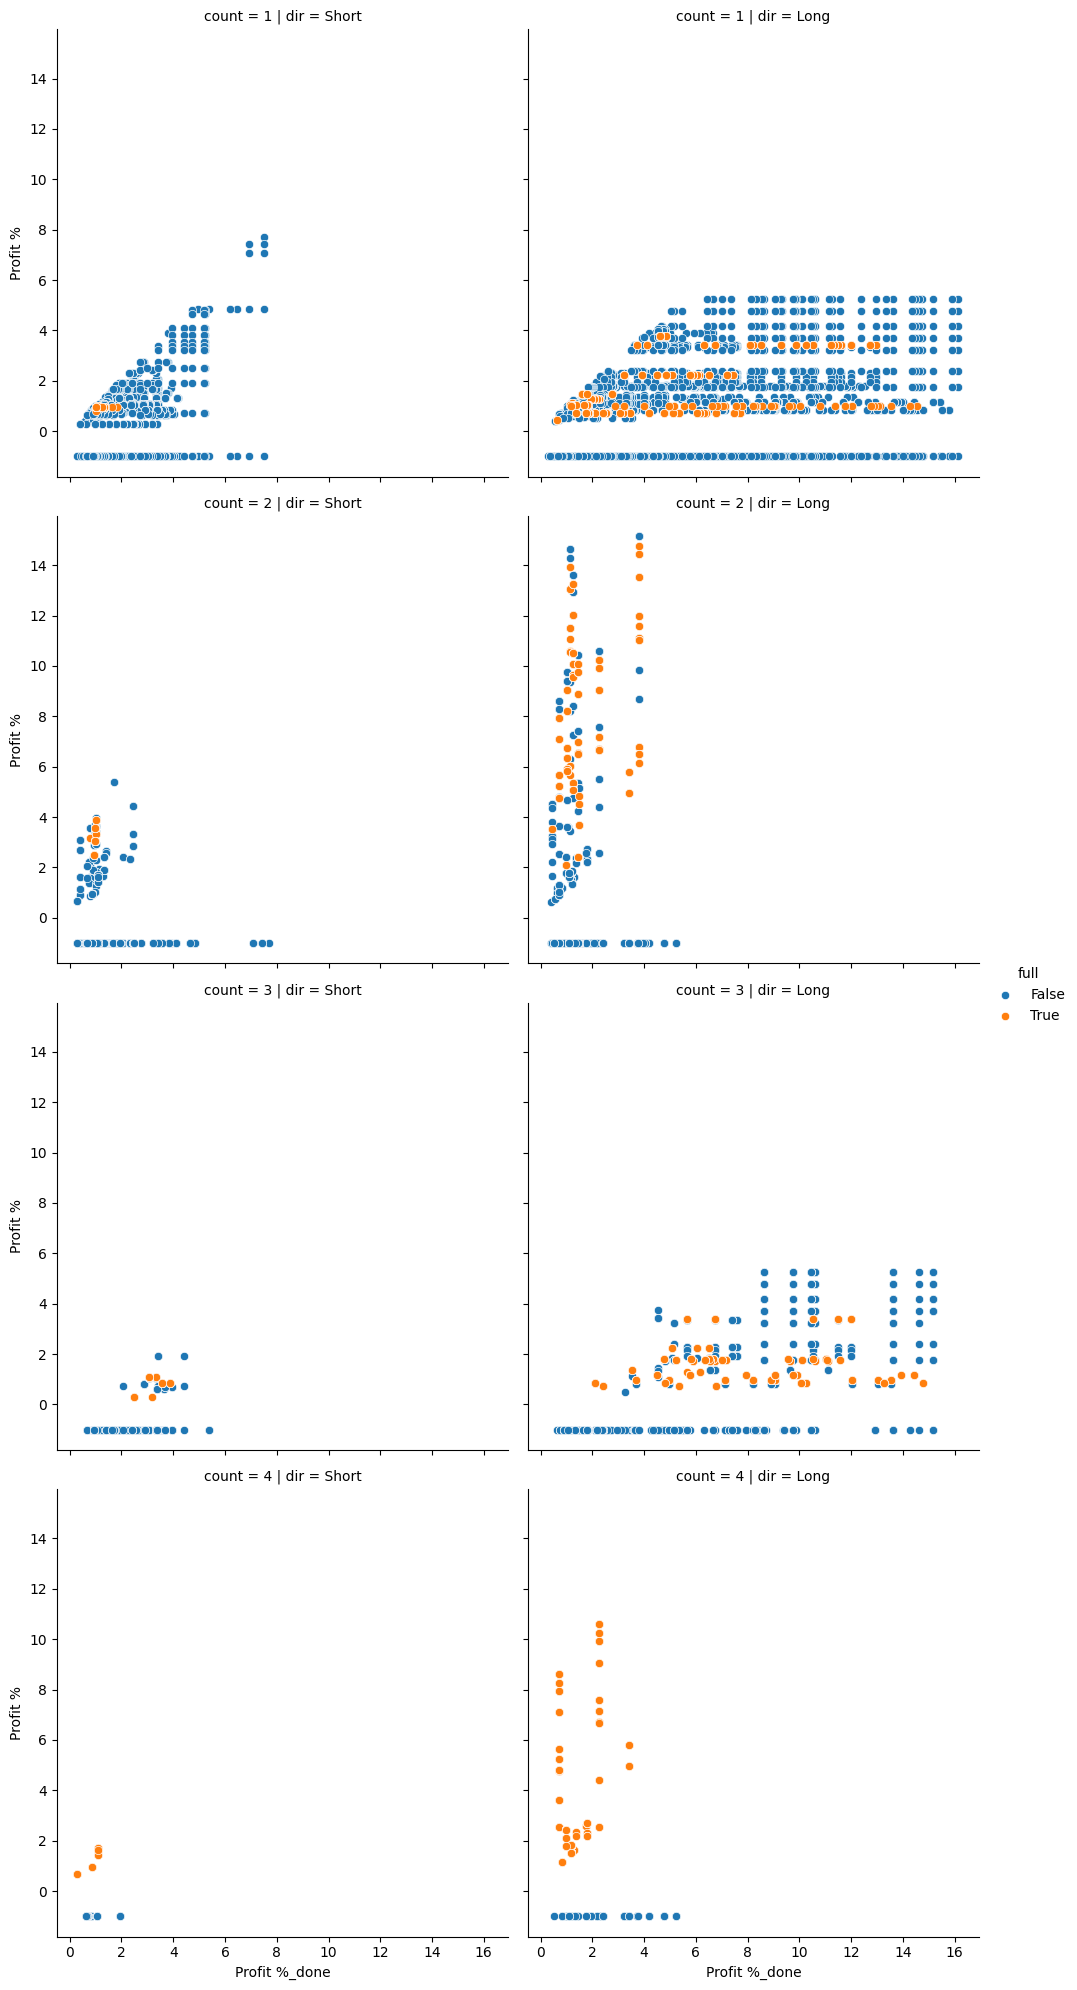

In [13]:
g = sns.FacetGrid(sns_df, row="count",col="dir",hue="full",height=5)
g.map(sns.scatterplot,"Profit %_done", "Profit %")
g.add_legend()

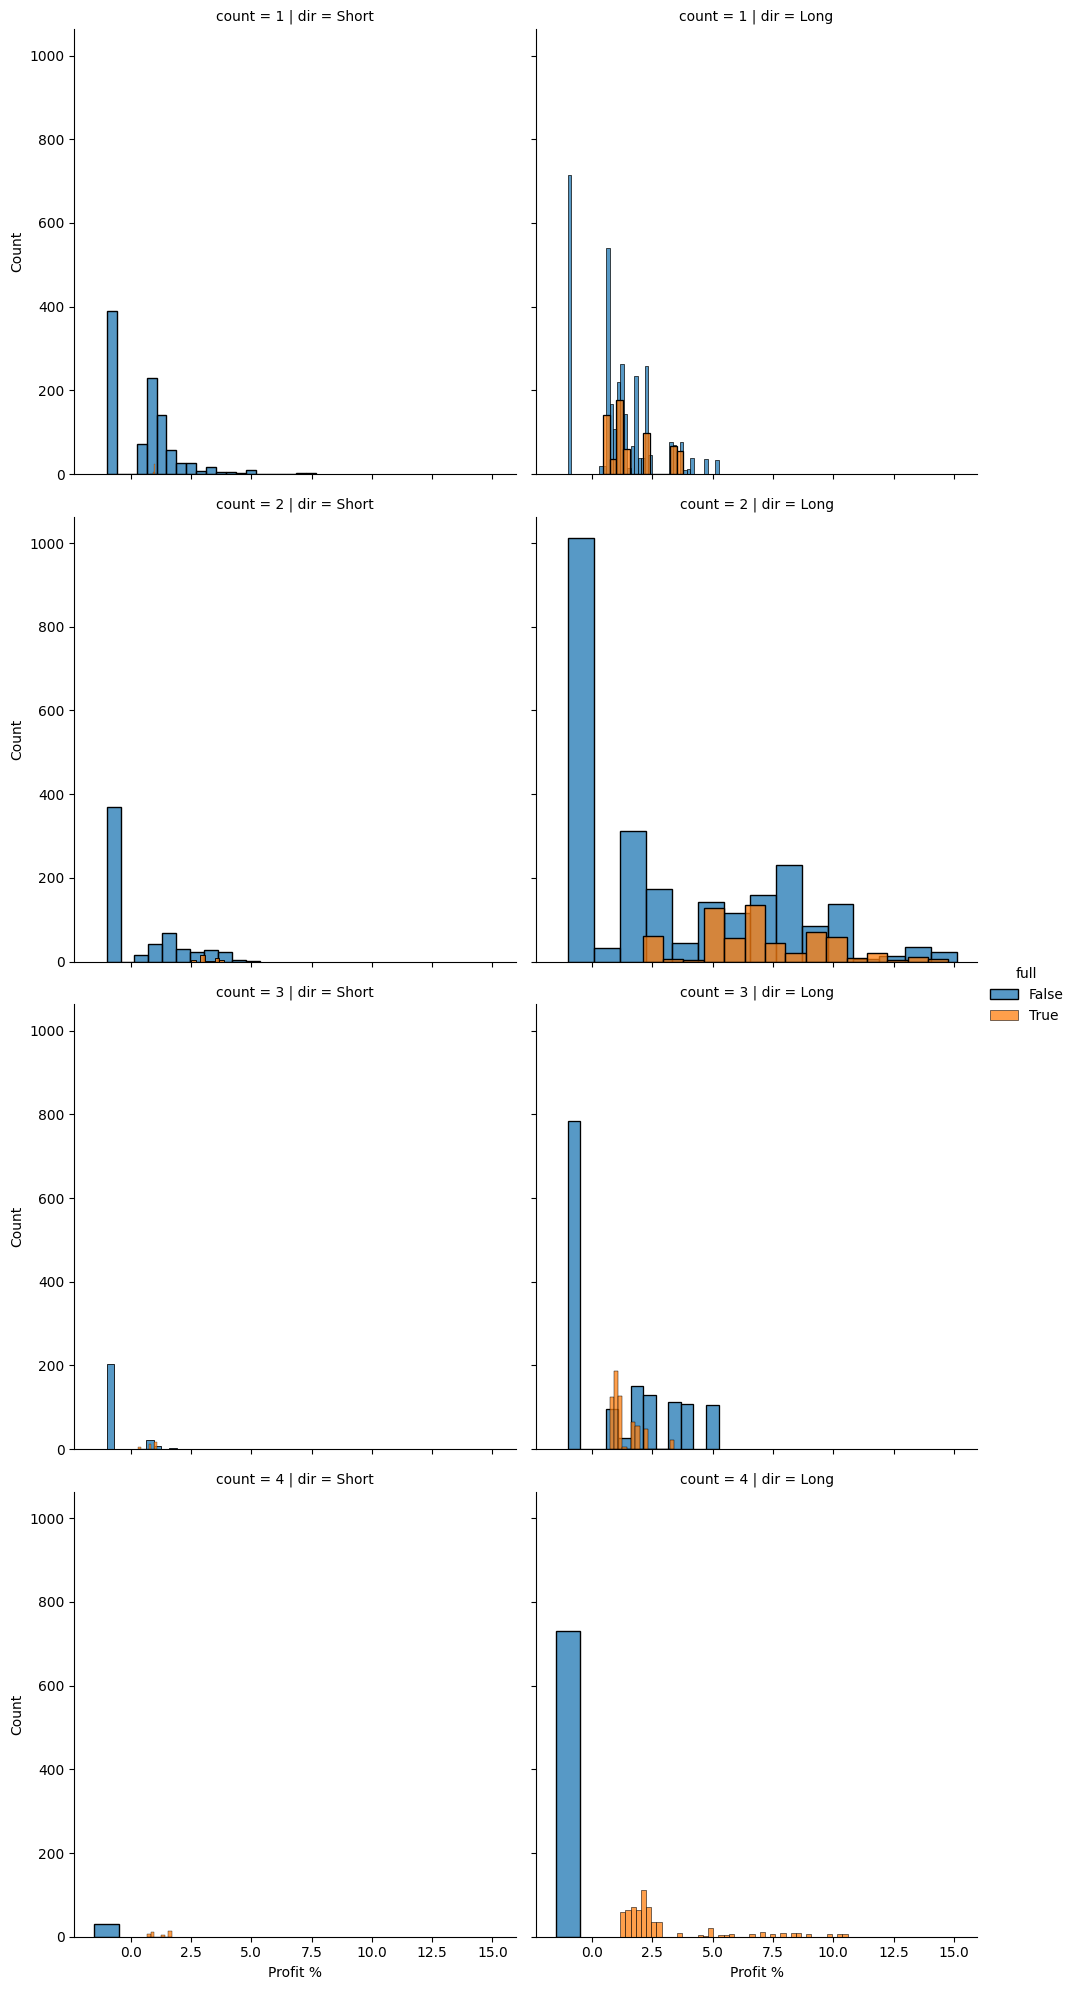

In [14]:
g = sns.FacetGrid(sns_df, row="count",col="dir",hue="full",height=5)
g.map(sns.histplot, "Profit %")
g.add_legend()

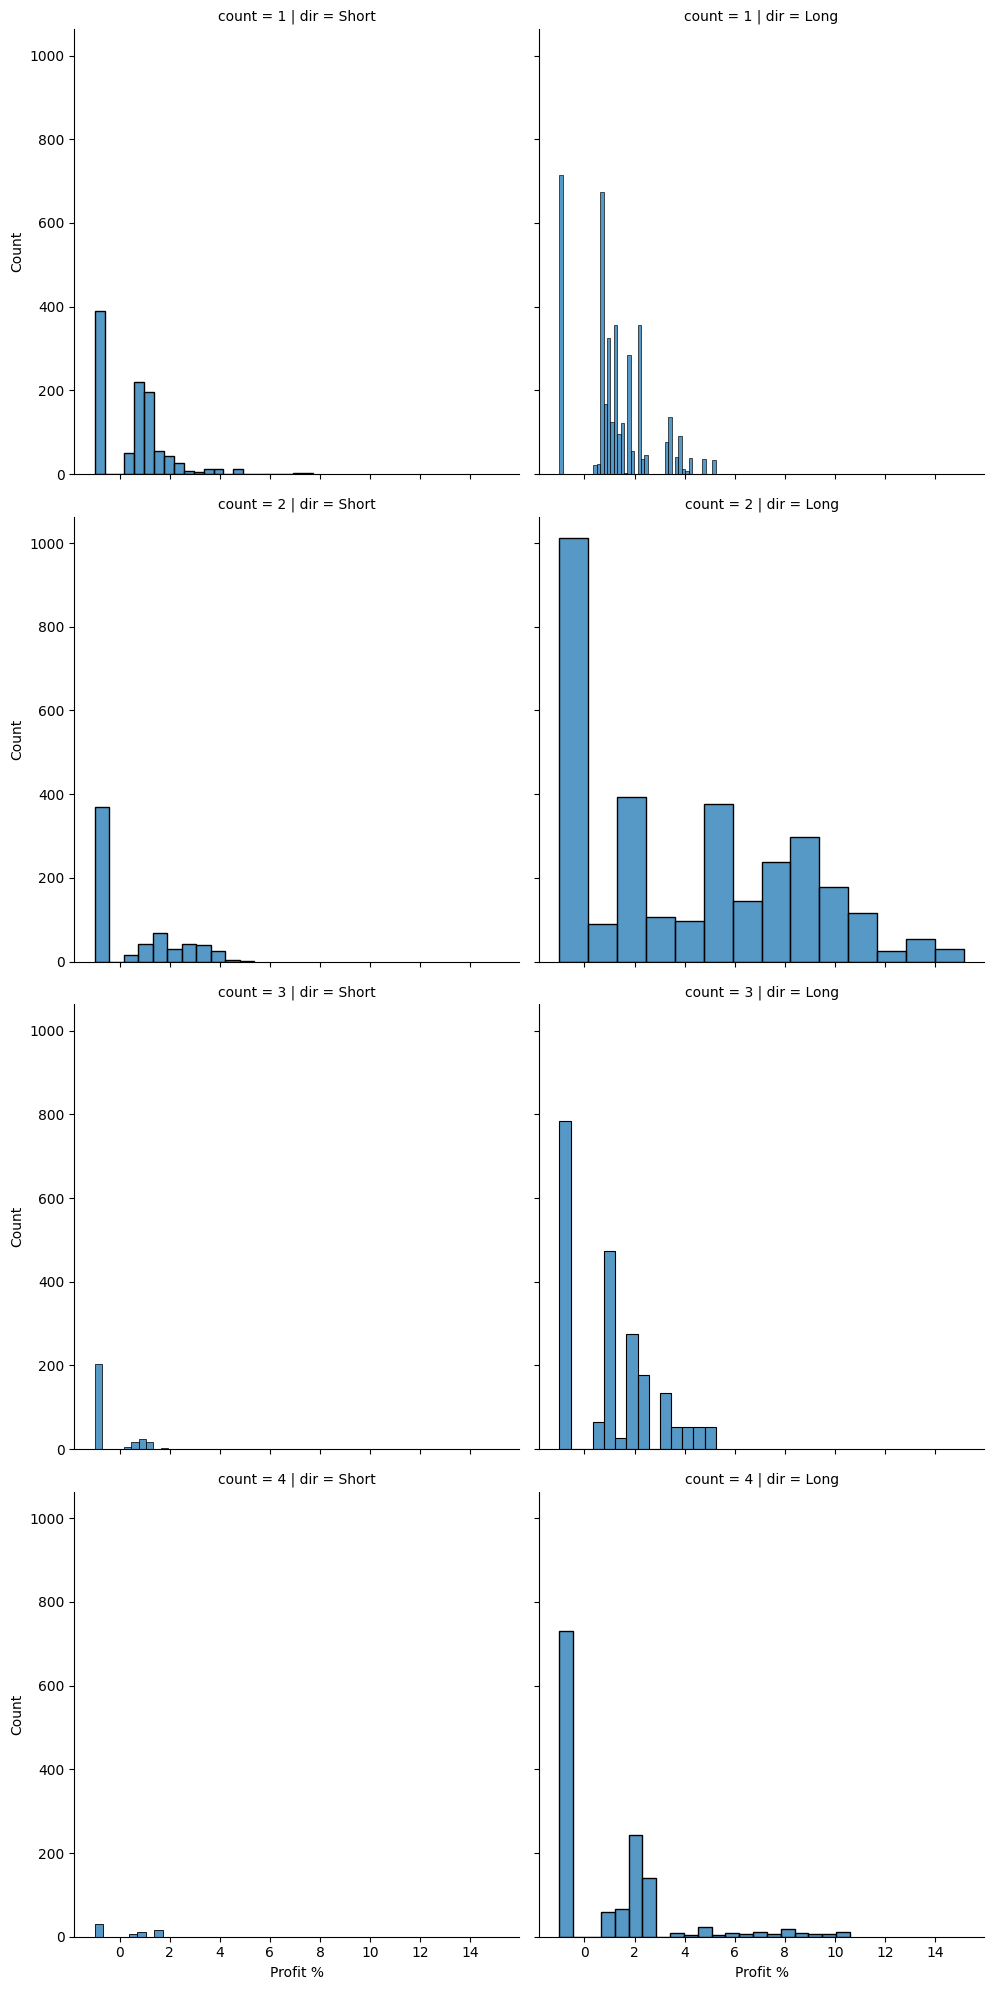

In [15]:
g = sns.FacetGrid(sns_df, row="count",col="dir",height=5)
g.map(sns.histplot, "Profit %")
g.add_legend()

# Анализ колчества успешных и неуспешных прогнозов